In [1]:
import os

import pandas as pd
import numpy as np

import plotly.express as px

from ray.tune import Analysis

In [2]:
sys.path.append(os.path.abspath('../src'))

from utils import ASSETS_DIR, standardise_column_names, correlation_matrix

In [3]:
# results = pd.read_json(os.path.join(ASSETS_DIR, 'results/', 'hpopt-results-sus-50.json'))

In [4]:
analysis = Analysis("/Users/adhaene/ray_results/invoke_run_2021-12-08_15-28-06")

In [5]:
result = analysis.dataframe()
result = standardise_column_names(result)

wanted_features = ['objective', 'config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr']
result.drop(columns=[f for f in result.columns if f not in wanted_features], inplace=True)

In [6]:
result

,objective,config_decay,config_distance,config_epochs,config_hidden_dim,config_layers,config_lr
0,27.537824,0.000511,1.0,90.0,64,5,0.000521
1,72.072156,0.000161,1.0,105.0,16,10,0.000593
2,574.764086,0.000384,5.0,105.0,64,10,0.000237
3,NaN,0.000337,5.0,90.0,32,10,0.000207
4,111.477437,0.000250,5.0,90.0,16,5,0.000267
5,342.032012,0.000257,5.0,120.0,64,15,0.000137
6,68.390922,0.000367,1.0,75.0,32,15,0.000412
7,23.687583,0.000488,1.0,105.0,32,5,0.000366
8,59.657835,0.000163,1.0,90.0,16,5,0.000668
9,38.141451,0.000330,1.0,105.0,64,10,0.000114


In [7]:
px.parallel_coordinates(result, dimensions=['config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr'],
                        color='objective', color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.8)

In [8]:
melted = pd.melt(result, id_vars='objective', value_vars=['config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr'])
melted

,objective,variable,value
0,27.537824,config_decay,0.000511
1,72.072156,config_decay,0.000161
2,574.764086,config_decay,0.000384
3,NaN,config_decay,0.000337
4,111.477437,config_decay,0.000250
...,...,...,...
139,119.742749,config_lr,0.000432
140,233.199613,config_lr,0.000153
141,57.458201,config_lr,0.000142
142,159.913111,config_lr,0.000245


In [10]:
px.scatter(melted, x='value', y='objective', facet_col='variable') \
    .update_layout(height=500) \
    .update_xaxes(matches=None) \
    .update_xaxes(type="log", col=1) \
    .update_xaxes(type="log", col=6)

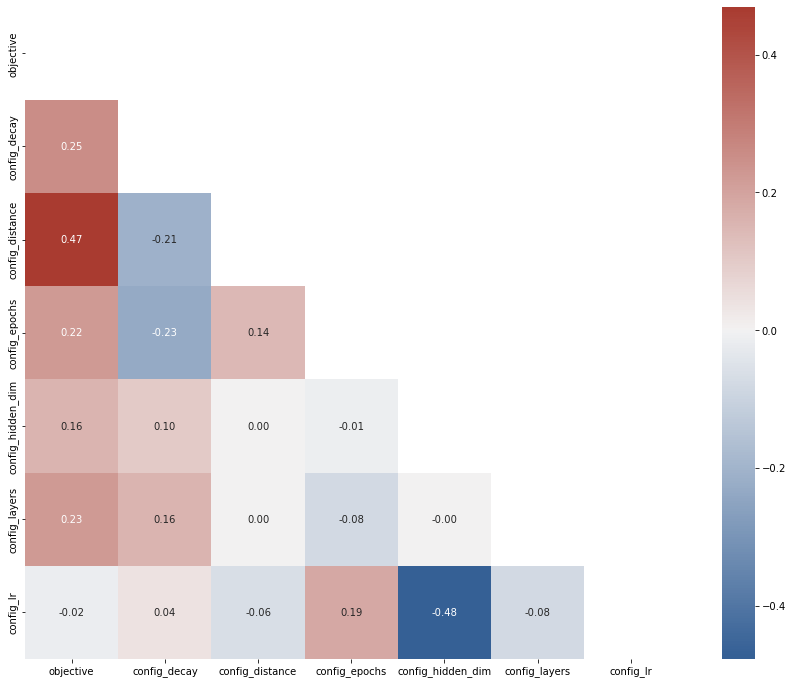

In [11]:
correlation_matrix(result)